This notebook gives an example of the extreme ease one can query log data from CDF. We have a notebook showing how we uploaded a number of .las files into one sequence under the 58-32 asset. All of the curves were put with one sequence.

In [1]:
#my CDF client uses tokens to authenticate, and I have configured the setup in another file.
%run config.py


/Users/noahkarsky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/cognite/client/_cognite_client.py:80: UserWarning: You are using version 2.31.0 of the SDK, however version 2.38.3 is available. Upgrade or set the environment variable 'COGNITE_DISABLE_PYPI_VERSION_CHECK' to suppress this warning.
  self._config = ClientConfig(


In [27]:
from cognite.client import CogniteClient
from cognite.client.data_classes import Sequence

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = c.sequences.data.retrieve_dataframe(id =5620926202135952 ,start=0,end=None)

In [30]:
#basic plot to inspect data 

#adapted from https://github.com/dianaceroallard/UtahForge_logdata
def make_layout_tc (log_df):
    
  
    fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, squeeze=True, figsize=(10,15), gridspec_kw={'wspace': 0.25})
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.975, top=0.7, wspace=0.2, hspace=0.2)
    axs[0].set_ylabel('Depth (ft)')
    axs[0].invert_yaxis()
    axs[0].get_xaxis().set_visible(False)
    
    # First track GR/SP/CALI logs to display
    ax1 = axs[0].twiny()  
    ax1.plot(log_df.GR, log_df.index, '-', color='#2ea869', linewidth=0.5)
    ax1.set_xlim(0,450) 
    ax1.set_xlabel('GR (API)', color='#2ea869')
    ax1.minorticks_on()
    ax1.spines['top'].set_position(('axes', 1.15)) 
    
    ax2 = axs[0].twiny() 
    ax2.plot(log_df.SP, log_df.index, '-', color='#0a0a0a', linewidth=0.7)
    ax2.set_xlim(-200,200) 
    ax2.set_xlabel('SP(mV)', color='#0a0a0a')
    ax2.minorticks_on()
    ax2.spines['top'].set_position(('axes', 1.075))    
      
    ax3 = axs[0].twiny() 
    ax3.plot(log_df.DCAL, log_df.index, '--', color='#9da4a1', linewidth=0.5)
    ax3.set_xlim(-5,15) 
    ax3.set_xlabel('DCAL (in)', color='#9da4a1')
    ax3.minorticks_on()
    ax3.spines['top'].set_position(('axes', 1.0))
    ax3.grid(True)
    axs[0].get_xaxis().set_visible(False)
    
    # Second track RHOB/NPHI/PEF logs to display
    ax1 = axs[1].twiny()  
    ax1.plot(log_df.RHOZ, log_df.index, '-', color='#ea0606', linewidth=0.5)
    ax1.set_xlim(1.5,3.0) 
    ax1.set_xlabel('RHOB (g/cm3)', color='#ea0606')
    ax1.minorticks_on()
    ax1.spines['top'].set_position(('axes', 1.15))

    ax2 = axs[1].twiny()  
    ax2.plot(log_df.NPHI, log_df.index, '-', color='#1577e0', linewidth=0.5)
    ax2.set_xlim(1,0) 
    ax2.set_xlabel('NPHI (v/v)', color='#1577e0')
    ax2.minorticks_on()
    ax2.spines['top'].set_position(('axes', 1.075))
    
    ax3 = axs[1].twiny()  
    ax3.plot(log_df.PEFZ, log_df.index, '-', color='#1acb20', linewidth=0.5)
    ax3.set_xlim(0,15) 
    ax3.set_xlabel('PEFZ (b/e)', color='#1acb20')
    ax3.minorticks_on()
    ax3.spines['top'].set_position(('axes', 1.0))
    ax3.grid(True)
    axs[1].get_xaxis().set_visible(False)
    
    # Third track Resistivities
    ax1 = axs[2].twiny()  
    ax1.plot(log_df.AT10, log_df.index, '-', color='#d6dbd7', linewidth=0.5)
    ax1.set_xlim(0.2,20000)  
    ax1.set_xlabel('AT10 (ohm.m)', color='#d6dbd7')
    ax1.set_xscale('log')
    ax1.minorticks_on()
    ax1.spines['top'].set_position(('axes', 1.15))
    
    ax2 = axs[2].twiny()  
    ax2.plot(log_df.AT30, log_df.index, '-', color='#0a0a0a', linewidth=0.5)
    ax2.set_xlim(0.2,20000)  
    ax2.set_xlabel('AT30 (ohm.m)', color='#0a0a0a')
    ax2.set_xscale('log')
    ax2.minorticks_on()
    ax2.spines['top'].set_position(('axes', 1.075))
    
    ax3 = axs[2].twiny()  
    ax3.plot(log_df.AT90, log_df.index, '-', color='#ea0606', linewidth=0.5)
    ax3.set_xlim(0.2,20000)  
    ax3.set_xlabel('AT90 (ohm.m)', color='#ea0606')
    ax3.set_xscale('log')
    ax3.minorticks_on()
    ax3.spines['top'].set_position(('axes', 1.0))
    ax3.grid(True)
    axs[2].get_xaxis().set_visible(False)


    fig.suptitle('Well Data for UTAH FORGE 58-32',weight='bold', fontsize=20, y=0.9);
    plt.show()

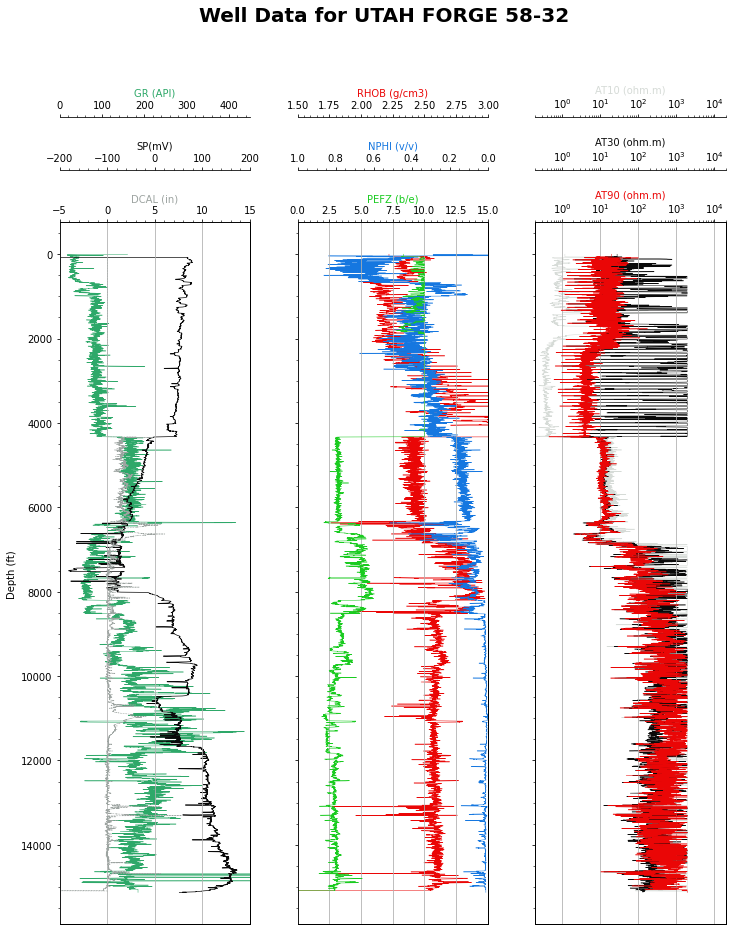

In [31]:
make_layout_tc (df)